#Busqueda Heuristica

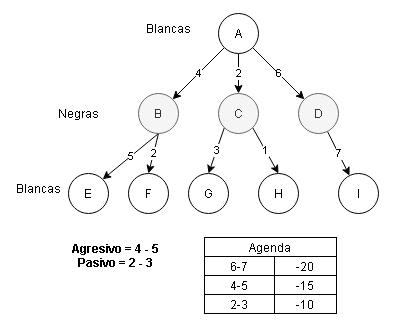


In [ ]:
#Estructura de datos

class Grafo(object):
    def __init__(self):
        self.relaciones = {}
    def __str__(self):
        return str(self.relaciones)

class Arista(object):
    def __init__(self, elemento, peso):
        self.elemento = elemento
        self.peso = peso      
    def __str__(self):
        return str(self.elemento) + str(self.peso)
 
class Modelo:

  def agregar(self, grafo, elemento):
      grafo.relaciones.update({elemento:[]})

  def relacionarUnilateral(self, grafo, origen, destino, peso):
      grafo.relaciones[origen].append(Arista(destino, peso))
  
  def relacionar(self, grafo, elemento1, elemento2, peso = 1):
      self.relacionarUnilateral(grafo, elemento1, elemento2, peso)
      

# En los niveles pares se va a maximizar
# En los niveles de profundidad impares de va a minimizar

class Controlador:
  def __init__(self):
    self.modelo = Modelo()
    self.grafo = Grafo()
    self.max_peso = 0
    self.node_name = ''
    self.min_peso = 0

    self.path = []  
    self.weight = []
    self.visitados = []
    self.level = 0

    self.nodos_directos = []
    self.promed_pesos = 0
    self.min_and_relacione = 0
    self.max_and_relaciones = 0
    self.Agenda = {}

  def maximizar(self, grafo, nodo):  
    self.max_peso = 0
    self.node_name = ''
    for arista in grafo.relaciones[nodo] :
      if(arista.peso > self.max_peso and (not(arista.elemento in self.visitados ) ) ):
        self.max_peso = arista.peso
        self.node_name = arista.elemento

    return [self.node_name, self.max_peso,  grafo.relaciones[nodo]]



  def minimizar(self, grafo, nodo):
    self.min_peso = 10
    self.node_name = ''
    for arista in grafo.relaciones[nodo]:
      if(arista.peso <= self.min_peso and (not(arista.elemento in self.visitados ) ) ):
        self.min_peso = arista.peso
        self.node_name = arista.elemento

    return [self.node_name , self.min_peso,  grafo.relaciones[nodo]]


  def encontrar_camino(self, grafo, node):

    if (node != "A" ):
      self.visitados.append(node)

    self.path.append(node)
    if (self.level % 2 == 0): #niveles pares
      self.max_and_relaciones = self.maximizar(grafo, node)
      self.weight.append(self.max_and_relaciones[1])
      self.level += 1
      if(self.max_and_relaciones[2] != []): #Si quedan nodos en alguna rama
        self.encontrar_camino(grafo, self.max_and_relaciones[0])

    else:#niveles impares
      self.min_and_relaciones = self.minimizar(grafo,node)
      self.weight.append(self.min_and_relaciones[1])
      self.level += 1
      if(self.min_and_relaciones[2] != []):
        self.encontrar_camino(grafo, self.min_and_relaciones[0])
    
    return self.path

  #path = encontrar_camino(grafo, 'e6')
  def agregargrafo(self, elemento):
    self.modelo.agregar(self.grafo, elemento)

  def relacionargrafo(self, elemento1, elemento2, peso):
    self.modelo.relacionar(self.grafo, elemento1, elemento2, peso)


  def start(self):
    self.nodos_directos = []
    for arista in self.grafo.relaciones["A"]:
      self.nodos_directos.append(arista.elemento)
      
    while (  len(self.visitados) < (len(self.grafo.relaciones.keys()) - 1 )  ):

      self.path = self.encontrar_camino(self.grafo, "A")
      self.level = 0

      #promedio de pesos para una rama
      self.promed_pesos = float(sum(self.weight) / (len(self.weight) - 1 ) )
      if(self.promed_pesos < self.weight[0]):
        print('El peso promedio: {0} \n El camino a seguir {1}'.format(self.promed_pesos, self.path ))
        break
      else:
        self.path.clear()
        self.weight.clear()
        #print('No se econtró camino satisfactorio!')


  #print('{0}\n{1}\n{2}\n{3}'.format(path, weight, nodos_directos, visitados))





In [ ]:

encontrar = Controlador()

encontrar.agregargrafo("A")
encontrar.agregargrafo("B")
encontrar.agregargrafo("C")
encontrar.agregargrafo("D")
encontrar.agregargrafo("E")
encontrar.agregargrafo("F")
encontrar.agregargrafo("G")
encontrar.agregargrafo("H")
encontrar.agregargrafo("I")

encontrar.relacionargrafo("A", "B", 4)
encontrar.relacionargrafo("A", "C", 2)
encontrar.relacionargrafo("A", "D", 6)
encontrar.relacionargrafo("B", "E", 5)
encontrar.relacionargrafo("B", "F", 2)
encontrar.relacionargrafo("C", "G", 3)
encontrar.relacionargrafo("C", "H", 1)
encontrar.relacionargrafo("D", "I", 7)

encontrar.start()



#mejor camino






El peso promedio: 3.0 
 El camino a seguir ['A', 'B', 'F']
